## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading the train and test data obtained from the CNN2 notebook
X_train = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/y_test.csv')
X_val = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/AI for CS/Datasets/y_val.csv')

In [12]:
print(X_train.shape[0])

499999


In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [17]:
#adding the 3d dimension to the features to be in the format (samples, timestep, features)
def transform_data(X):
  new_X = []
  for i in range(X.shape[0]):
    new_X.append(X.iloc[i].values.reshape(1,81))
  return np.array(new_X)

In [20]:
#adding a dimension to the labels 
def transform_label(y):
  new_y = []
  for i in range(y.shape[0]):
    new_y.append(y.iloc[i].values.reshape(1,11))
  return np.array(new_y)

In [18]:
X_tr = transform_data(X_train)
X_val = transform_data(X_val)
X_test = transform_data(X_test)

In [21]:
y_tr = transform_label(y_train)
y_val = transform_label(y_val)
y_te = transform_label(y_test)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop

In [23]:
# Create a Sequential model: 
lstm_model = Sequential()

# Add layers with the add() method: 
lstm_model.add(LSTM(64, input_shape= (1,81),return_sequences=True))
lstm_model.add(Dense(11, activation= 'softmax')) 

In [24]:
#creating optimizer for the model rmsprop
rmsprop = RMSprop(learning_rate= 0.0005)
lstm_model.compile(rmsprop, loss= 'categorical_crossentropy', metrics=["accuracy"])

In [25]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             37376     
                                                                 
 dense (Dense)               (None, 1, 11)             715       
                                                                 
Total params: 38,091
Trainable params: 38,091
Non-trainable params: 0
_________________________________________________________________


In [26]:
#training the model
history = lstm_model.fit(X_tr, y_tr, batch_size= 255, epochs= 150, validation_data= (X_val, y_val))

Epoch 1/150
1961/1961 [==============================] - 19s 7ms/step - loss: 0.8569 - accuracy: 0.6371 - val_loss: 0.6640 - val_accuracy: 0.6702
Epoch 2/150
1961/1961 [==============================] - 13s 7ms/step - loss: 0.6524 - accuracy: 0.6742 - val_loss: 0.6360 - val_accuracy: 0.6792
Epoch 3/150
1961/1961 [==============================] - 13s 6ms/step - loss: 0.6380 - accuracy: 0.6781 - val_loss: 0.6283 - val_accuracy: 0.6830
Epoch 4/150
1961/1961 [==============================] - 13s 7ms/step - loss: 0.6322 - accuracy: 0.6793 - val_loss: 0.6258 - val_accuracy: 0.6819
Epoch 5/150
1961/1961 [==============================] - 13s 7ms/step - loss: 0.6283 - accuracy: 0.6806 - val_loss: 0.6505 - val_accuracy: 0.6707
Epoch 6/150
1961/1961 [==============================] - 13s 7ms/step - loss: 0.6253 - accuracy: 0.6827 - val_loss: 0.6213 - val_accuracy: 0.6836
Epoch 7/150
1961/1961 [==============================] - 12s 6ms/step - loss: 0.6241 - accuracy: 0.6843 - val_loss: 0.6193 -

In [27]:
#saving the model
lstm_model.save('lstm.h5')

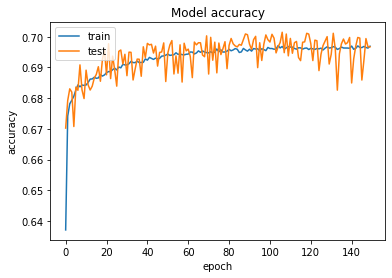

In [37]:
#plotting the train validation accuracy curve
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

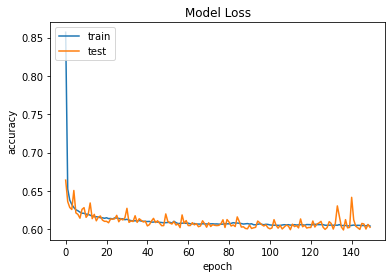

In [41]:
#plotting the train validation loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')